In [1]:
import math
import os

import matplotlib.pyplot as plt
import numpy as np

In [2]:
source = 'networkrepository'  # SNAP or networkrepository

if source == 'SNAP':
    data_dir = os.path.expanduser('~/Documents/Datasets/temporal-networks-snap')
    name = 'CollegeMsg.txt'
    path = os.path.join(data_dir, name)
    with open(path, 'r') as f:
        lines = f.readlines()

    if name.endswith('tsv'):
        separator = '\t'
        lines = np.array([line.split(separator)[:3] for line in lines[1:]], dtype=np.str)
        vertex_id = {j : i for (i, j) in enumerate(lines.flatten())}
        lines = np.array([vertex_id[v] for v in lines.flatten()]).reshape(lines.shape)
        lines = np.array([[int(x) for x in line] for line in lines])
    else:
        if name.endswith('txt'):
            separator = ' '
        elif name.endswith('csv'):
            separator = ','
        lines = np.array([[int(x) for x in line.split(separator)[:3]] for line in lines])
else:
    data_dir = os.path.expanduser('~/Documents/Datasets/temporal-networks-network-repository')
    name = 'ia-contact'
    path = os.path.join(data_dir, name, name+'.edges')
    with open(path, 'r') as f:
        lines = f.readlines()
        
    if name == 'soc-sign-bitcoinalpha':
        lines = np.loadtxt(path, delimiter=',', dtype=np.int64)
        lines = np.concatenate((lines[:, :2], lines[:, 3:]), axis=1)
    elif name == 'fb-forum' or name == 'ia-contacts_hypertext2009':
        lines = np.loadtxt(path, delimiter=',', dtype=np.float64)
        lines = np.array(lines, dtype=np.int64)
    elif name == 'ia-contact':
        lines = [line.split('\t') for line in lines]
        lines = [[*line[0].split(), line[1].split()[1]] for line in lines]
        lines = np.array(lines, dtype=np.int64)
    elif name == 'ia-enron-employees':
        lines = [line.split() for line in lines]
        lines = [[line[0], line[1], line[3]] for line in lines]
        lines = np.array(lines, dtype=np.int64)
    elif name == 'ia-radoslaw-email' or name == 'soc-wiki-elec':
        lines = [line.split() for line in lines[2:]]
        lines = [[line[0], line[1], line[3]] for line in lines]
        lines = np.array(lines, dtype=np.int64)
        
lines = lines[lines[:, 2].argsort()]
m = len(lines)

In [3]:
duplicates, repeats = [], []
splits = np.linspace(0.05, 0.95, 19)
static_train = set()
static_test = {(edge[0], edge[1]) for edge in lines}
cur = 0
for split in splits:
    idx = math.ceil(split*m)
    train, test = lines[:idx, :], lines[idx:, :]
    
    moving_edges = {(edge[0], edge[1]) for edge in lines[cur:idx]}
    staying_edges = {(edge[0], edge[1]) for edge in lines[idx:]}
    removals = moving_edges - staying_edges
    
    static_train.update(moving_edges)
    static_test = static_test - removals
    
    cur = idx
    
    # Within the test split, what fraction of edges are duplicates? 
    duplicate = 1 - len(static_test) / len(test)
    duplicates.append(duplicate)
    
    # What fraction of edges in the test split already exist in the train split?
    repeat = np.sum([(edge in static_train) for edge in static_test]) / len(static_test)
    repeats.append(repeat)
    
    print('Split: {:.2f}, duplicate: {:.3f}, repeat: {:.3f}'.format(split, duplicate, repeat))

Split: 0.05, duplicate: 0.892, repeat: 0.275
Split: 0.10, duplicate: 0.886, repeat: 0.338
Split: 0.15, duplicate: 0.881, repeat: 0.376
Split: 0.20, duplicate: 0.877, repeat: 0.461
Split: 0.25, duplicate: 0.870, repeat: 0.512
Split: 0.30, duplicate: 0.862, repeat: 0.554
Split: 0.35, duplicate: 0.858, repeat: 0.608
Split: 0.40, duplicate: 0.848, repeat: 0.630
Split: 0.45, duplicate: 0.840, repeat: 0.655
Split: 0.50, duplicate: 0.831, repeat: 0.670
Split: 0.55, duplicate: 0.819, repeat: 0.675
Split: 0.60, duplicate: 0.809, repeat: 0.684
Split: 0.65, duplicate: 0.791, repeat: 0.718
Split: 0.70, duplicate: 0.768, repeat: 0.749
Split: 0.75, duplicate: 0.738, repeat: 0.769
Split: 0.80, duplicate: 0.713, repeat: 0.777
Split: 0.85, duplicate: 0.675, repeat: 0.832
Split: 0.90, duplicate: 0.625, repeat: 0.839
Split: 0.95, duplicate: 0.579, repeat: 0.830


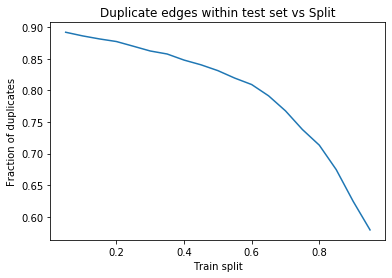

In [4]:
plt.xlabel('Train split')
plt.ylabel('Fraction of duplicates')
plt.title('Duplicate edges within test set vs Split')
plt.plot(splits, duplicates)

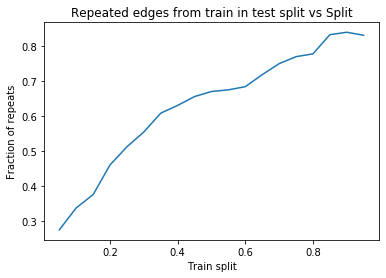

In [5]:
plt.xlabel('Train split')
plt.ylabel('Fraction of repeats')
plt.title('Repeated edges from train in test split vs Split')
plt.plot(splits, repeats)